In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension dataste x: (100, 2)
dimension dataste y: (100, 1)


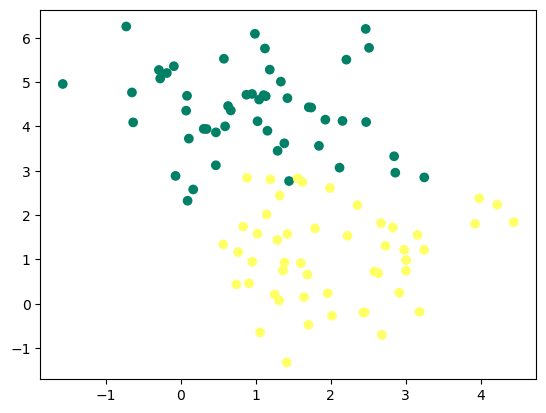

In [89]:
# datastet creation
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print("dimension dataste x:", x.shape)
print("dimension dataste y:", y.shape)

# visualisation dataset
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='summer')
plt.show()

## 1.Fonctionnement du neurone ( ce qu'il faut retenir)

In [ ]:
#Initialisation

def initralisation():
    w = np.random.rand(x.shape[1], 1)
    b = np.random.rand(1)
    return w, b
w, b = initralisation()

In [91]:
#STEP 1: activation function

def activation(x,w,b):
    z =np.dot(x,w)+b
    a = 1/(1+np.exp(-z)) # sigmoid
    return a

In [92]:
#StEP 2: loss fonction

def loss(y, a):
    m = y.shape[0]
    cost = -1/m *np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    return cost

In [93]:
#STEP 3: gradient descent
def gradien_descent(x, y, a):
    m = y.shape[0]
    dw = 1/m * np.dot(x.T, (a-y))
    db = 1/m * np.sum(a-y)
    return dw, db

In [94]:
#STEP 4: optimisation

def optimisation(w, b, learning_rate):
    dw, db = gradien_descent(x, y, activation(x,w,b))

    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b


In [95]:
# Fonction de prediction
def predict(x, w, b):
    a = activation(x, w, b)
    proba = a
    return a >= 0.5, proba

In [129]:
#Boucle d'entrainement

def neurone_network(x, y, w, b, learning_rate, epochs): #epoches =nbre d'iteration
    costs = []

    for i in range(epochs):
        a = activation(x, w, b)
        costs.append(loss(y, a))
        w, b = optimisation(w, b, learning_rate)

    y_pred, proba = predict(x, w, b)
    print("accuracy:", accuracy_score(y, y_pred))

    plt.plot(costs) # visualisation de la courbe d'apprentissage
    plt.show()
    return w, b, costs


accuracy: 0.93


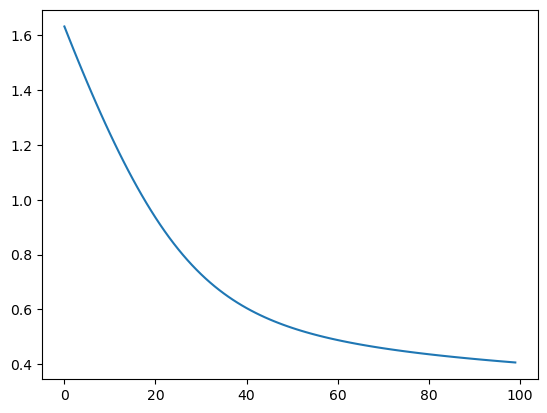

w_final: [[ 0.17423085]
 [-0.42829054]]
b_final: [0.62474139]


In [130]:
#Entrainement du neurone avec notre dataset
w_final, b_final, costs = neurone_network(x, y, w, b, learning_rate=0.01, epochs=100)

print("w_final:", w_final)
print("b_final:", b_final)


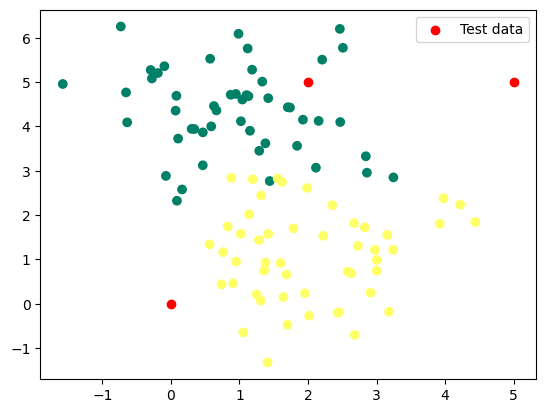

In [131]:
# test prediction with new data: step 1: create new data 

x_test = np.array([[0, 0], [2, 5], [5, 5]]) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='summer') # old data visualisation
plt.scatter(x_test[:, 0], x_test[: ,1], c='red', label='Test data') # test data visualisation
plt.legend()
plt.show()

In [99]:
# test prediction with new data: step 2: predict with new data

y_test_pred, y_test_proba = predict(x_test, w_final, b_final)
print("Predictions for test data:", y_test_pred)
print("Probabilities for test data:", y_test_proba)

Predictions for test data: [[ True]
 [False]
 [False]]
Probabilities for test data: [[0.65129613]
 [0.23717152]
 [0.34399144]]


# .############################################################################################################.
##  2.Complement
A ce stade, l'essentiel est déjà fait, on peut donc s'arrêter ici. la suite concerne l'amélioration 



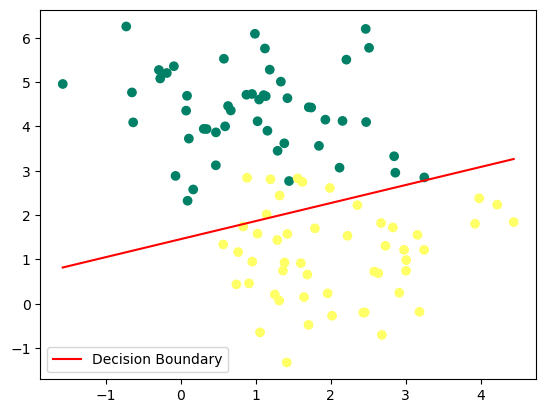

In [100]:
# decision boundary visualisation (visualisation de la frontière de décision)

x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100) # create 100 points between the minimum and maximum of the first feature
x2 = -(w_final[0] * x1 + b_final) / w_final[1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='summer')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.legend()
plt.show()

In [123]:
# visualisation 3D
from plotly import graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=x[:, 0], 
    y=x[:, 1], 
    z=y.flatten(), 
    mode='markers', 
    marker=dict(size=5, color=y.flatten(), colorscale='Viridis', opacity=0.8))])

fig.add_scatter3d(x=x[:,0].flatten(),
                  y=x[:,1].flatten(),
                  z=y.flatten(),mode='markers',marker=dict(size=5,color=activation(x,w_final,b_final).flatten(),colorscale='Viridis',opacity=0.8))

fig.update_layout(template='plotly_dark', 
                  margin=dict(l = 0, r = 0, b = 0, t = 0), 
                  scene= dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='y'),
                  title='3D Visualization of Dataset')
fig.layout.scene.camera.projection.type = 'orthographic'  # Set orthographic projection
fig.show()

In [135]:
x0 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
x1 = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(x0, x1)
z = w_final[0] * xx0 + w_final[1] * xx1 + b_final
a = 1/(1+np.exp(-z))

fig = go.Figure(data=[go.Surface(z=a, x=xx0, y=xx1, colorscale='YlGn', opacity=0.7, reversescale=True)])
fig.add_scatter3d(x=x[:,0].flatten(),
                  y=x[:,1].flatten(),
                  z=y.flatten(),
                  mode='markers',
                  marker=dict(size=5,color=y.flatten(),colorscale='YlGn',opacity=0.9, reversescale=True))
fig.update_layout(template='plotly_dark', 
                  margin=dict(l = 0, r = 0, b = 0, t = 0))
fig.layout.scene.camera.projection.type = 'orthographic'  # Set orthographic projection
fig.show()
                              

### Animation

In [150]:
#Boucle d'entrainement ( pour l'animation )

def neurone_network(x, y, w, b, learning_rate, epochs): #epoches =nbre d'iteration
    costs = []
    history = [] #(pour l'animation )

    for i in range(epochs):
        a = activation(x, w, b)
        costs.append(loss(y, a))
        w, b = optimisation(w, b, learning_rate)
        history.append((w, b, costs, i)) #(pour l'animation )

    y_pred, proba = predict(x, w, b)
    print("accuracy:", accuracy_score(y, y_pred))

    plt.plot(costs) # visualisation de la courbe d'apprentissage
    plt.show()
    return history


In [151]:
def animate(params):

    W = params[0]
    b = params[1]
    loss_history = params[2]
    i = params[3]

    ax[0].clear()  # frontière de décision
    ax[1].clear()  # sigmoïde
    ax[2].clear()  # fonction coût

    s = 300

    # frontière de décision
    ax[0].scatter(x[:, 0], x[:, 1], c=y, s=s,
                  cmap='summer', edgecolors='white', linewidths=2)

    x1 = np.linspace(-3, 6, 100)
    x2 = (-W[0] * x1 - b) / W[1]
    ax[0].plot(x1, x2, c='#FF6B6B', lw=4, label='Decision Boundary')

    ax[0].set_xlim(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5)
    ax[0].set_ylim(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5)
    ax[0].set_title(f'Frontière de Décision (Itération {i+1})', fontsize=14, fontweight='bold', color='white')
    ax[0].set_xlabel('x1', fontsize=12, color='white')
    ax[0].set_ylabel('x2', fontsize=12, color='white')
    ax[0].grid(True, alpha=0.3, color='white')
    ax[0].legend(loc='upper right', fontsize=10)
    ax[0].set_facecolor('#1a1a1a')

    # sigmoïde
    z = x.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new))

    ax[1].plot(z_new, A, c='#FFD93D', lw=4, label='Sigmoid')
    ax[1].scatter(z[y.flatten() == 0],
                  np.zeros(z[y.flatten() == 0].shape),
                  c='#6BCB77', edgecolors='white',
                  linewidths=2, s=s, label='Class 0')
    ax[1].scatter(z[y.flatten() == 1],
                  np.ones(z[y.flatten() == 1].shape),
                  c='#FF6B6B', edgecolors='white',
                  linewidths=2, s=s, label='Class 1')
    x0 = 0
    ax[1].vlines(x0, ymin=0, ymax=1, colors='#FF6B6B', linewidths=2, linestyles='--')

    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_ylim(-0.1, 1.1)
    ax[1].set_title('Fonction Sigmoid', fontsize=14, fontweight='bold', color='white')
    ax[1].set_xlabel('z', fontsize=12, color='white')
    ax[1].set_ylabel('A(z)', fontsize=12, color='white')
    ax[1].grid(True, alpha=0.3, color='white')
    ax[1].legend(loc='center left', fontsize=10)
    ax[1].set_facecolor('#1a1a1a')

    for j in range(len(A[y.flatten() == 0])):
        ax[1].vlines(z[y.flatten() == 0][j],
                     ymin=0,
                     ymax=1 / (1 + np.exp(-z[y.flatten() == 0][j])),
                     color='#FF6B6B',
                     alpha=0.3,
                     zorder=-1)

    for j in range(len(A[y.flatten() == 1])):
        ax[1].vlines(z[y.flatten() == 1][j],
                     ymax=1,
                     ymin=1 / (1 + np.exp(-z[y.flatten() == 1][j])),
                     color='#FF6B6B',
                     alpha=0.3,
                     zorder=-1)

    # Fonction coût
    if i > 0:
        ax[2].plot(range(i+1), loss_history[:i+1], color='#4D96FF', lw=3, label='Loss')
        ax[2].fill_between(range(i+1), loss_history[:i+1], alpha=0.3, color='#4D96FF')
    
    ax[2].set_xlim(0, len(loss_history))
    ax[2].set_ylim(0, loss_history[0] + 0.1)
    ax[2].set_title(f'Fonction Coût | Loss: {loss_history[i]:.4f}', fontsize=14, fontweight='bold', color='white')
    ax[2].set_xlabel('Itération', fontsize=12, color='white')
    ax[2].set_ylabel('Loss', fontsize=12, color='white')
    ax[2].grid(True, alpha=0.3, color='white')
    ax[2].legend(loc='upper right', fontsize=10)
    ax[2].set_facecolor('#1a1a1a')
    
    # Ajouter les axes en blanc
    for spine in ax[0].spines.values():
        spine.set_edgecolor('white')
    for spine in ax[1].spines.values():
        spine.set_edgecolor('white')
    for spine in ax[2].spines.values():
        spine.set_edgecolor('white')
    
    ax[0].tick_params(colors='white')
    ax[1].tick_params(colors='white')
    ax[2].tick_params(colors='white')

C:\Users\HP\AppData\Local\Temp\ipykernel_32764\2581448936.py:84: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



✅ Animation créée avec succès!

📊 Visualisation de l'animation:


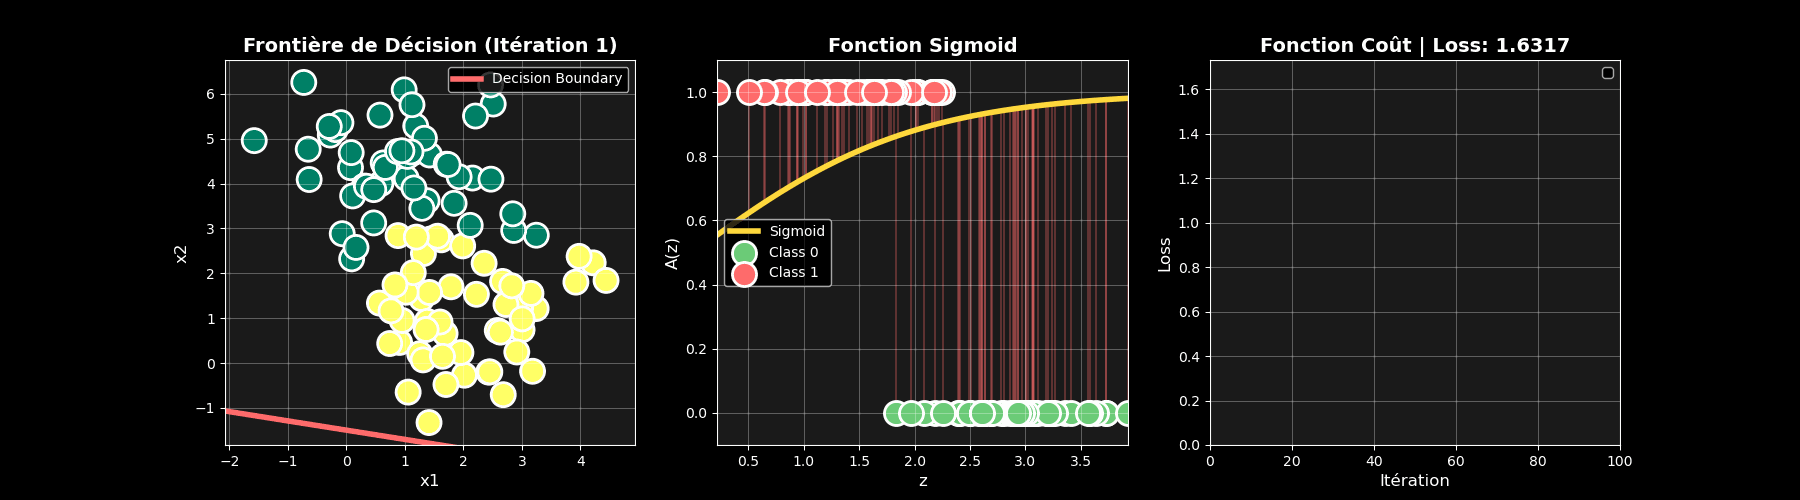

In [152]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import Image, display

# Dark mode
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.patch.set_facecolor('#0d0d0d')

ani = FuncAnimation(
    fig,
    animate,
    frames=history,
    interval=100,
    repeat=True,
    blit=False
)

# Créer une animation GIF pour pouvoir l'afficher dans le notebook
writer = animation.PillowWriter(fps=10)
ani.save("animation.gif", writer=writer)

plt.close()

# Afficher l'animation dans le notebook
print("✅ Animation créée avec succès!")
print("\n📊 Visualisation de l'animation:")
display(Image('animation.gif'))